In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unicorn-startups-cleaned/Unicorn_Clean.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../input/unicorn-startups-cleaned/Unicorn_Clean.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,NaN
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,NaN
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,NaN


In [4]:
df.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Investor 1', 'Investor 2', 'Investor 3', 'Investor 4'],
      dtype='object')

<AxesSubplot:>

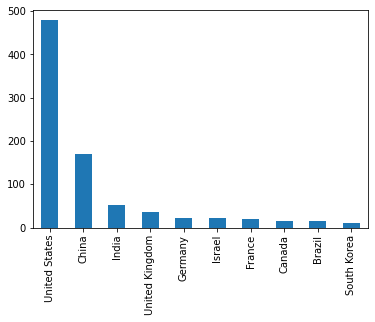

In [5]:
df.Country.value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

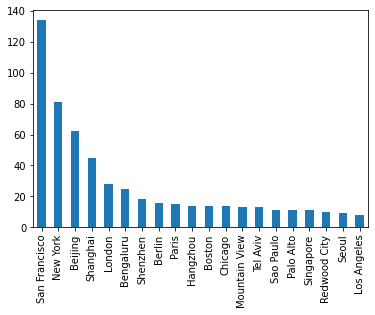

In [6]:
df.City.value_counts().head(20).plot(kind='bar')

In [7]:
df.Industry.value_counts()

Fintech                              191
Internet software & services         167
E-commerce & direct-to-consumer      102
Artificial intelligence               73
Health                                63
Other                                 51
Supply chain logistics & delivery     51
Cybersecurity                         41
Mobile & telecommunications           37
Data management & analytics           36
Hardware                              32
Auto & transportation                 29
Edtech                                27
Consumer & retail                     23
Travel                                13
Name: Industry, dtype: int64

In [8]:
data_df = df[df.Industry.isin(['Artificial intelligence','Data management & analytics'])]
data_df.head(20)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4
0,Bytedance,140.00,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
6,Databricks,38.00,2019-02-05,United States,San Francisco,Data management & analytics,Andreessen Horowitz,New Enterprise Associates,Battery Ventures,NaN
24,Faire,12.40,2019-10-30,United States,San Francisco,Artificial intelligence,Khosla Ventures,Forerunner Ventures,Sequoia Capital,NaN
26,SenseTime,12.00,2017-07-11,China,Shanghai,Artificial intelligence,Star VC,IDG Capital,Infore Capital,Alibaba Group
33,Celonis,11.00,2018-06-26,Germany,Munich,Data management & analytics,Accel,83North,NaN,NaN
71,Scale AI,7.30,2019-08-05,United States,San Francisco,Artificial intelligence,Accel,Y Combinator,Index Ventures,NaN
72,Argo AI,7.25,2019-07-12,United States,Pittsburgh,Artificial intelligence,Volkswagen Group,Ford Autonomous Vehicles,NaN,NaN
73,Gong,7.25,2020-08-12,United States,Palo Alto,Artificial intelligence,Norwest Venture Partners,Next World Capital,Wing Venture Capital,NaN
78,Automation Anywhere,6.80,2018-07-02,United States,San Jose,Artificial intelligence,General Atlantic,Goldman Sachs,New Enterprise Associates,NaN
85,DataRobot,6.30,2019-07-29,United States,Boston,Artificial intelligence,New Enterprise Associates,Accomplice,IA Ventures,NaN


In [9]:
data_df.City.value_counts().head(15)

Beijing          10
San Francisco    10
New York          9
Shanghai          5
Mountain View     4
Palo Alto         4
Shenzhen          4
San Jose          3
Boston            3
Sunnyvale         3
San Mateo         2
Chicago           2
Singapore         2
London            2
Tel Aviv          2
Name: City, dtype: int64

In [10]:
data_df.Industry.value_counts()

Artificial intelligence        73
Data management & analytics    36
Name: Industry, dtype: int64

In [11]:
data_df[data_df.City=='Beijing']['Company']

0                  Bytedance
118         Horizon Robotics
155                   MEGVII
359                4Paradigm
455         Jusfoun Big Data
618                    Aibee
643                 Unisound
644    Mininglamp Technology
753                  Momenta
791              AInnovation
Name: Company, dtype: object

In [12]:
india_df = df[df.Country=='India']

In [13]:
india_df.City.value_counts()

Bengaluru      25
Gurgaon         7
Mumbai          5
Gurugram        3
New Delhi       2
Pune            2
Noida           1
Faridabad       1
Thane           1
Bangalore       1
Chennai         1
Jaipur          1
Maharashtra     1
Name: City, dtype: int64

In [14]:
india_df.Industry.value_counts()

Fintech                              12
E-commerce & direct-to-consumer      12
Internet software & services          8
Supply chain logistics & delivery     6
Edtech                                5
Auto & transportation                 2
Health                                2
Other                                 2
Travel                                1
Mobile & telecommunications           1
Name: Industry, dtype: int64

In [15]:
india_df.shape

(51, 10)

In [16]:
india_df.Industry.value_counts()

Fintech                              12
E-commerce & direct-to-consumer      12
Internet software & services          8
Supply chain logistics & delivery     6
Edtech                                5
Auto & transportation                 2
Health                                2
Other                                 2
Travel                                1
Mobile & telecommunications           1
Name: Industry, dtype: int64

In [17]:
india_df[['Company','Valuation ($B)','Industry','Date Joined']]

,Company,Valuation ($B),Industry,Date Joined
12,BYJU's,21.00,Edtech,2017-07-25
53,OYO Rooms,9.60,Travel,2018-09-25
62,Dream11,8.00,Internet software & services,2019-04-09
80,National Stock Exchange of India,6.50,Fintech,2020-07-01
83,Ola Cabs,7.50,Auto & transportation,2014-10-27
115,Swiggy,5.50,Supply chain logistics & delivery,2018-06-21
126,Meesho,4.90,Internet software & services,2021-04-05
153,CRED,4.01,Fintech,2021-04-06
193,Digit Insurance,3.50,Fintech,2021-01-15
199,Unacademy,3.44,Edtech,2020-09-02


In [18]:
india_df[india_df.Industry == 'Fintech']['Company']

80     National Stock Exchange of India
153                                CRED
193                     Digit Insurance
234                           Pine Labs
236                            Razorpay
257                               Groww
266                            BharatPe
304                        PolicyBazaar
420                    CoinSwitch Kuber
681                             CoinDCX
686              Acko General Insurance
927                               Slice
Name: Company, dtype: object

In [19]:
india_df[india_df.Industry == 'Edtech']['Company']

12                           BYJU's
199                       Unacademy
215    Eruditus Executive Education
631                          UpGrad
898                         Vedantu
Name: Company, dtype: object

In [20]:
india_df[india_df.Industry == 'Internet software & services']['Company']

62                   Dream11
126                   Meesho
245                ShareChat
299    Mobile Premier League
683                     apna
794                DailyHunt
880                  Zetwerk
926                 NoBroker
Name: Company, dtype: object

In [21]:
blore_df = india_df[india_df.City.isin(['Bengaluru','Bangalore'])]
blore_df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4
12,BYJU's,21.00,2017-07-25,India,Bengaluru,Edtech,Tencent Holdings,Lightspeed India Partners,Sequoia Capital India,NaN
83,Ola Cabs,7.50,2014-10-27,India,Bengaluru,Auto & transportation,Accel Partners,SoftBank Group,Sequoia Capital,NaN
115,Swiggy,5.50,2018-06-21,India,Bengaluru,Supply chain logistics & delivery,Accel India,SAIF Partners,Norwest Venture Partners,NaN
126,Meesho,4.90,2021-04-05,India,Bengaluru,Internet software & services,Venture Highway,Sequoia Capital India,Prosus Ventures,NaN
153,CRED,4.01,2021-04-06,India,Bengaluru,Fintech,Tiger Global Management,DST Global,Sequoia Capital India,NaN


In [22]:
blore_df.shape

(26, 10)

In [23]:
# filter1 = df.Ind=="CRED"
# filter2 = data["Age"]>24
# data.where(filter1 & filter2, inplace = True)

In [24]:
blore_df.Industry.value_counts()

Internet software & services         7
Fintech                              7
Edtech                               3
Supply chain logistics & delivery    3
Auto & transportation                2
Health                               1
Mobile & telecommunications          1
E-commerce & direct-to-consumer      1
Other                                1
Name: Industry, dtype: int64

In [25]:
blore_df[['Company','Valuation ($B)','Industry','Date Joined']]

,Company,Valuation ($B),Industry,Date Joined
12,BYJU's,21.00,Edtech,2017-07-25
83,Ola Cabs,7.50,Auto & transportation,2014-10-27
115,Swiggy,5.50,Supply chain logistics & delivery,2018-06-21
126,Meesho,4.90,Internet software & services,2021-04-05
153,CRED,4.01,Fintech,2021-04-06
193,Digit Insurance,3.50,Fintech,2021-01-15
199,Unacademy,3.44,Edtech,2020-09-02
221,Udaan,3.10,Supply chain logistics & delivery,2018-09-04
236,Razorpay,3.00,Fintech,2020-10-11
245,ShareChat,3.00,Internet software & services,2021-04-08


In [26]:
blore_df[blore_df.Industry == 'Fintech']['Company']

153                      CRED
193           Digit Insurance
236                  Razorpay
257                     Groww
420          CoinSwitch Kuber
686    Acko General Insurance
927                     Slice
Name: Company, dtype: object

In [27]:
blore_df[blore_df.Industry == 'Internet software & services']['Company']

126                   Meesho
245                ShareChat
299    Mobile Premier League
683                     apna
794                DailyHunt
880                  Zetwerk
926                 NoBroker
Name: Company, dtype: object

In [28]:
blore_df[blore_df.Industry == 'Edtech']['Company']

12        BYJU's
199    Unacademy
898      Vedantu
Name: Company, dtype: object